In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
from pathlib import Path
import cmocean as cmo
import numpy as np
import gsw
from pathlib import Path
import xarray as xr

In [44]:
ctd_coords = {
    "06-05-2025": [
        {"station": "CTD_01", "lat": 57.55908, "lon": 11.52267},
        {"station": "CTD_02", "lat": 57.38777, "lon": 10.91448},
        {"station": "CTD_03", "lat": 57.45603, "lon": 10.91703},
        {"station": "CTD_04", "lat": 57.55742, "lon": 10.92852},
    ],
    "07-05-2025": [
        {"station": "CTD_05", "lat": 57.93132, "lon": 10.78290},
        {"station": "CTD_06", "lat": 57.93152, "lon": 10.78217},
        {"station": "CTD_07", "lat": 57.91377, "lon": 10.77933},
        {"station": "CTD_08", "lat": 57.89787, "lon": 10.78037},
        {"station": "CTD_09", "lat": 57.88090, "lon": 10.77900},
        {"station": "CTD_10", "lat": 57.86350, "lon": 10.77672},
        {"station": "CTD_11", "lat": 57.84738, "lon": 10.77847},
        {"station": "CTD_12", "lat": 57.83070, "lon": 10.77527},
        {"station": "CTD_13", "lat": 57.81407, "lon": 10.77190},
        {"station": "CTD_14", "lat": 57.79728, "lon": 10.76980},
        {"station": "CTD_15", "lat": 57.77958, "lon": 10.77200},
        {"station": "CTD_16", "lat": 57.77958, "lon": 10.77207},
    ],
    "08-05-2025": [
        {"station": "CTD_17", "lat": 57.91045, "lon": 11.12052},
        {"station": "CTD_18", "lat": 57.55908, "lon": 11.52267},
    ]
}


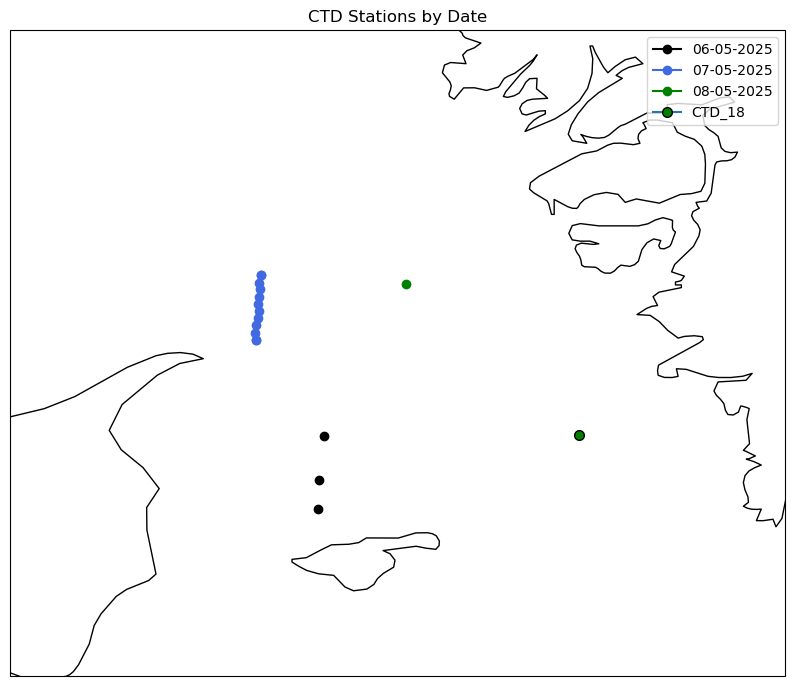

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Color map for days
colors = {
    "06-05-2025": "black",
    "07-05-2025": "royalblue",
    "08-05-2025": "green"
}

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([10.2, 12, 57, 58.5], crs=ccrs.PlateCarree())

# Plot all stations except the final one
for date, stations in ctd_coords.items():
    for i, point in enumerate(stations):
        if point["station"] == "CTD_18":
            continue  # We'll plot CTD_18 separately
        ax.plot(point["lon"], point["lat"], marker='o', color=colors[date], label=date if i == 0 else "", transform=ccrs.PlateCarree())

# Plot CTD_18 as a ring with black border
ctd18 = ctd_coords["08-05-2025"][-1]
ax.plot(ctd18["lon"], ctd18["lat"], marker='o', markersize=7, markerfacecolor='green', 
        markeredgecolor='black', label="CTD_18", transform=ccrs.PlateCarree()
)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.title("CTD Stations by Date")
plt.show()


In [46]:
# Open NetCDF GEBCO file
ds = xr.open_dataset(r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\GEBCO_19_May_2025_a1fb72d80520\GEBCO_19_May_2025_a1fb72d80520\gebco_2024_n59.0_s56.9_w9.5_e12.5.nc")

# GEBCO data usually uses variables:
# - 'elevation' (or 'z') for depth
# - 'lat' and 'lon' for coordinates
elevation = ds["elevation"]  # or ds["z"]
lats = ds["lat"]
lons = ds["lon"]

# Optional: subset to your region of interest (e.g., Skagerrak)
elev_subset = elevation.sel(
    lat=slice(57, 58.5),  # South to North
    lon=slice(10.2, 12)   # West to East
)


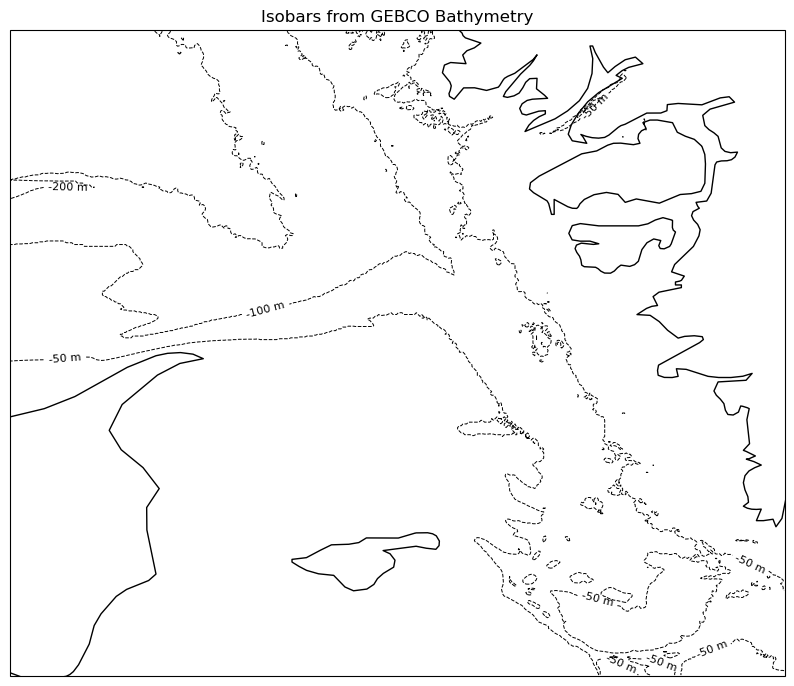

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([10.2, 12, 57, 58.5], crs=ccrs.PlateCarree())

# Create contour levels (negative = underwater)
contour_levels = [-200, -100, -50]

# Plot contours
contours = ax.contour(
    elev_subset["lon"], elev_subset["lat"], elev_subset,
    levels=contour_levels,
    colors="black",
    linewidths=0.7,
    transform=ccrs.PlateCarree()
)

# Add contour labels
ax.clabel(contours, fmt="%d m", fontsize=8)

plt.title("Isobars from GEBCO Bathymetry")
plt.show()


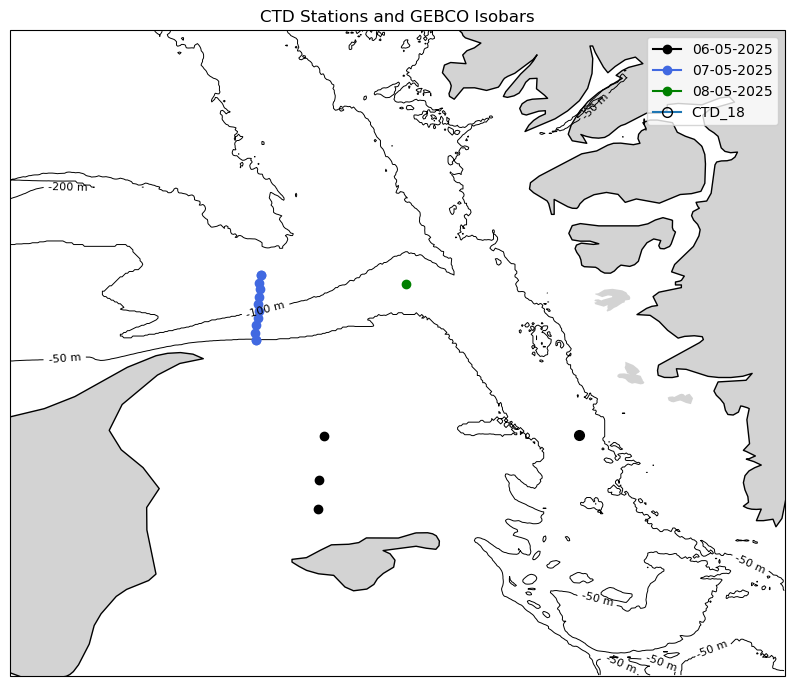

In [52]:
# Color map for CTD days
colors = {
    "06-05-2025": "black",
    "07-05-2025": "royalblue",
    "08-05-2025": "green"
}

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([10.2, 12, 57, 58.5], crs=ccrs.PlateCarree())

# Plot bathymetric isobars
contour_levels = [-200, -100, -50]
contours = ax.contour(
    elev_subset["lon"], elev_subset["lat"], elev_subset,
    levels=contour_levels,
    colors="black",
    linewidths=0.7,
    linestyles='solid',
    transform=ccrs.PlateCarree()
)
ax.clabel(contours, fmt="%d m", fontsize=8)

# Plot all CTD stations except the last
for date, stations in ctd_coords.items():
    for i, point in enumerate(stations):
        if point["station"] == "CTD_18":
            continue
        ax.plot(
            point["lon"], point["lat"],
            marker='o',
            color=colors[date],
            label=date if i == 0 else "",
            transform=ccrs.PlateCarree()
        )

# Highlight CTD_18 as a ring with black outline
ctd18 = ctd_coords["08-05-2025"][-1]
ax.plot(
    ctd18["lon"], ctd18["lat"],
    marker='o',
    markersize=7,
    markerfacecolor='none',
    markeredgecolor='black',
    label="CTD_18",
    transform=ccrs.PlateCarree()
)

# Create clean legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.title("CTD Stations and GEBCO Isobars")
plt.show()


In [53]:
import csv

# Save to this path (change if needed)
output_path = "ctd_stations.csv"

# Flatten the dictionary into rows
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Station", "Date", "Latitude", "Longitude"])
    
    for date, stations in ctd_coords.items():
        for station in stations:
            writer.writerow([
                station["station"],
                date,
                station["lat"],
                station["lon"]
            ])
